In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from keras.utils import np_utils
from keras.models import Sequential
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

c:\Users\Sineth Sankalpa\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
X = np.load("../numpy/X.npy")
y = np.load("../numpy/y.npy")
y_train = np.load("../numpy/y_train.npy")
y_test = np.load("../numpy/y_test.npy")

FileNotFoundError: [Errno 2] No such file or directory: '../numpy/X.npy'

In [3]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(194696, 48, 48, 1) (64899, 48, 48, 1)
(194696, 8) (64899, 8)


In [2]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block1_conv1', input_shape=(48, 48, 1) ))
model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block1_conv2'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block1_maxpool'))

model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block2_conv1'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block2_conv2'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block2_maxpool'))

model.add(Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block3_conv1'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block3_conv2'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block3_conv3'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block3_maxpool'))

model.add(Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block4_conv1'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block4_conv2'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block4_conv3'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block4_maxpool'))

model.add(Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block5_conv1'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block5_conv2'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block5_conv3'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block5_maxpool'))

model.add(Flatten())
model.add(Dense(4096, kernel_regularizer=l2(1e-7), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4096, kernel_regularizer=l2(1e-7), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0002), loss='categorical_crossentropy', metrics=['accuracy']) 
# model.load_weights("../models/ground_VGG16-best_val_loss_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        640       
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_maxpool (MaxPooling2  (None, 24, 24, 64)       0         
 D)                                                              
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_maxpool (MaxPooling2  (None, 12, 12, 128)      0         
 D)                                                     

In [8]:
# datagen = ImageDataGenerator(
#     horizontal_flip=True,
#     rotation_range=10,
#     zoom_range=0.1,
#     shear_range=0.1,
#     width_shift_range=0.1,
#     height_shift_range=0.1
# )

In [5]:
best_loss_checkpoint = ModelCheckpoint(
    filepath=f'../models/AN-VGG16-best_loss_model.h5',
    monitor='loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath=f'../models/AN-VGG16-best_val_loss_model.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

In [8]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    validation_steps=X_test.shape[0] // 64,
    epochs=2,  
    verbose=1,  
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/2
6085/6085 [==============================] - 16467s 3s/step - loss: 0.8475 - accuracy: 0.7105 - val_loss: 0.7872 - val_accuracy: 0.7276
Epoch 2/2
6085/6085 [==============================] - 15627s 3s/step - loss: 0.7626 - accuracy: 0.7356


In [10]:
model.load_weights("../models/AN-VGG16-best_loss_model.h5")

history = model.fit(
    X_train,
    y_train,
    steps_per_epoch=len(X_train) // 64,
    validation_data=(X_test, y_test),
    validation_steps=X_test.shape[0] // 64,
    epochs=3,  
    verbose=1, 
    initial_epoch=2, 
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 3/3
3042/3042 [==============================] - 18473s 6s/step - loss: 0.6603 - accuracy: 0.7688 - val_loss: 0.7658 - val_accuracy: 0.7390


In [4]:
best_loss_checkpoint = ModelCheckpoint(
    filepath='../models/AN/AN-VGG16-blm-{epoch:02d}-{loss:.2f}.h5',
    monitor='loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath='../models/AN/AN-VGG16-bvlm-{epoch:02d}-{val_loss:.2f}.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

In [5]:
datagen = ImageDataGenerator()

In [14]:
model.load_weights("../models/AN-VGG16-best_loss_model.h5")

bs = 64
history = model.fit(
    datagen.flow(X_train, y_train, shuffle=True, batch_size=bs),
    steps_per_epoch=len(X_train) // bs,
    validation_data=(X_test, y_test),
    epochs=5,  
    verbose=1, 
    initial_epoch=3, 
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 4/5
3042/3042 [==============================] - 19679s 6s/step - loss: 0.5848 - accuracy: 0.7937 - val_loss: 0.7976 - val_accuracy: 0.7367
Epoch 5/5
3042/3042 [==============================] - 19580s 6s/step - loss: 0.4890 - accuracy: 0.8273 - val_loss: 0.8421 - val_accuracy: 0.7286


In [18]:
model.load_weights("../models/AN/AN-VGG16-blm-5-0.48.h5")

bs = 64
history = model.fit(
    datagen.flow(X_train, y_train, shuffle=True, batch_size=bs),
    steps_per_epoch=len(X_train) // bs,
    validation_data=(X_test, y_test),
    epochs=6,  
    verbose=1, 
    initial_epoch=5,  
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 6/6
3042/3042 [==============================] - 18805s 6s/step - loss: 0.3946 - accuracy: 0.8605 - val_loss: 0.9468 - val_accuracy: 0.7235


In [19]:
model.load_weights("../models/AN/AN-VGG16-blm-06-0.39.h5")

bs = 64
history = model.fit(
    datagen.flow(X_train, y_train, shuffle=True, batch_size=bs),
    steps_per_epoch=len(X_train) // bs,
    validation_data=(X_test, y_test),
    epochs=8,  
    verbose=1, 
    initial_epoch=6,  
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 7/8
3042/3042 [==============================] - 18757s 6s/step - loss: 0.3126 - accuracy: 0.8902 - val_loss: 1.0874 - val_accuracy: 0.7195
Epoch 8/8
3042/3042 [==============================] - 19300s 6s/step - loss: 0.2586 - accuracy: 0.9104 - val_loss: 1.1014 - val_accuracy: 0.7123


In [20]:
model.load_weights("../models/AN/AN-VGG16-blm-08-0.26.h5")

bs = 64
history = model.fit(
    datagen.flow(X_train, y_train, shuffle=True, batch_size=bs),
    steps_per_epoch=len(X_train) // bs,
    validation_data=(X_test, y_test),
    epochs=10,  
    verbose=1, 
    initial_epoch=8,  
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 9/10
3042/3042 [==============================] - 16867s 6s/step - loss: 0.2195 - accuracy: 0.9247 - val_loss: 1.2354 - val_accuracy: 0.7130
Epoch 10/10
3042/3042 [==============================] - 15150s 5s/step - loss: 0.1947 - accuracy: 0.9336 - val_loss: 1.3709 - val_accuracy: 0.7092


In [8]:
model.load_weights("../models/AN/AN-VGG16-blm-10-0.19.h5")

bs = 64
history = model.fit(
    datagen.flow(X_train, y_train, shuffle=True, batch_size=bs),
    steps_per_epoch=len(X_train) // bs,
    validation_data=(X_test, y_test),
    validation_batch_size=bs,
    validation_steps=len(X_test) // bs,
    epochs=12,  
    verbose=1, 
    initial_epoch=10,  
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 11/12
3042/3042 [==============================] - 15622s 5s/step - loss: 0.1853 - accuracy: 0.9371 - val_loss: 1.4464 - val_accuracy: 0.7074
Epoch 12/12
3042/3042 [==============================] - 15569s 5s/step - loss: 0.1591 - accuracy: 0.9468 - val_loss: 1.3966 - val_accuracy: 0.7102


In [6]:
X_val = np.load("../numpy/X_val.npy")   
y_val = np.load("../numpy/y_val.npy")

In [16]:
model.load_weights("../models/AN/AN-VGG16-bvlm-04-0.79.h5")

loss, acc = model.evaluate(X_val, y_val)
loss, acc

113/113 [==============================] - 70s 625ms/step - loss: 2.0653 - accuracy: 0.4207


(2.065261125564575, 0.420687735080719)

<AxesSubplot:xlabel='predicted', ylabel='actual'>

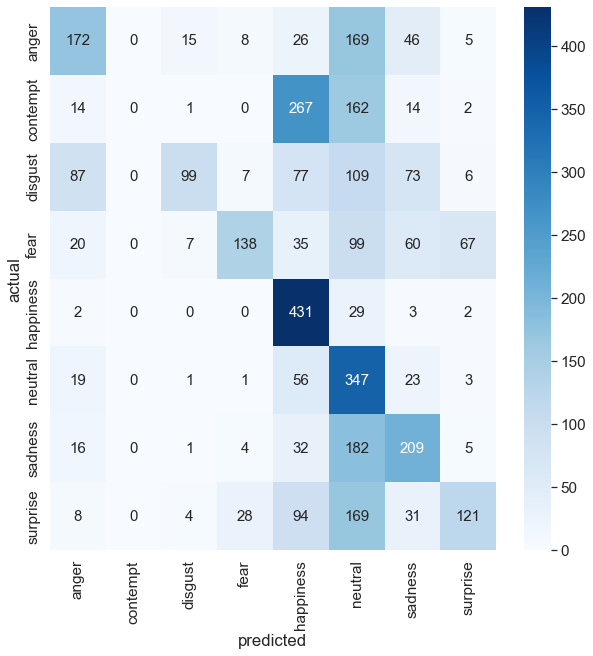

In [18]:
predictions = model.predict(X_val)
confusion = confusion_matrix(
    np.argmax(y_val, axis=1),
    np.argmax(predictions, axis=1)
)

labels = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (10, 10))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")

In [19]:
model.load_weights("../models/AN/AN-VGG16-bvlm-06-0.95.h5")

loss, acc = model.evaluate(X_val, y_val)
loss, acc

113/113 [==============================] - 68s 602ms/step - loss: 2.3283 - accuracy: 0.4376


(2.32828688621521, 0.43760398030281067)

<AxesSubplot:xlabel='predicted', ylabel='actual'>

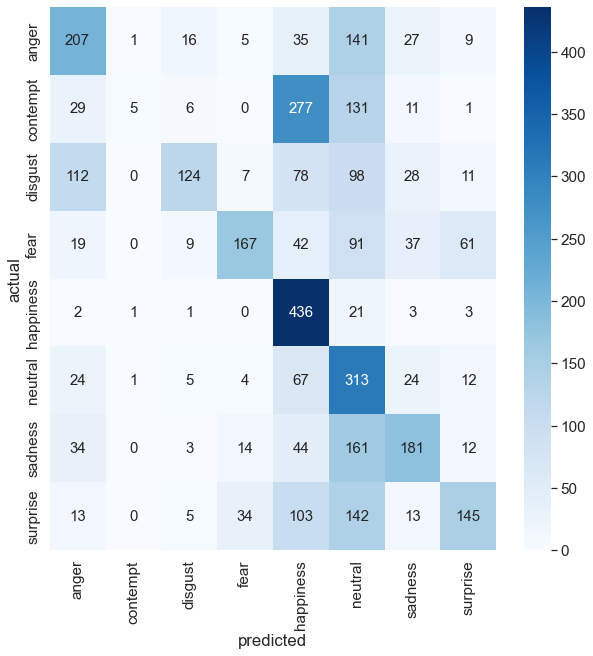

In [20]:
predictions = model.predict(X_val)
confusion = confusion_matrix(
    np.argmax(y_val, axis=1),
    np.argmax(predictions, axis=1)
)

labels = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (10, 10))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")

In [21]:
model.load_weights("../models/AN/AN-VGG16-bvlm-11-1.45.h5")

loss, acc = model.evaluate(X_val, y_val)
loss, acc

113/113 [==============================] - 61s 540ms/step - loss: 3.5620 - accuracy: 0.4395


(3.561978578567505, 0.439545214176178)

<AxesSubplot:xlabel='predicted', ylabel='actual'>

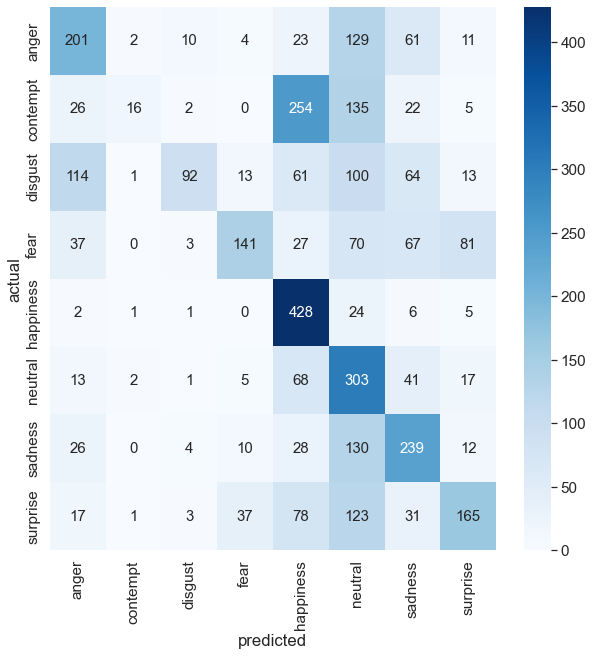

In [22]:
predictions = model.predict(X_val)
confusion = confusion_matrix(
    np.argmax(y_val, axis=1),
    np.argmax(predictions, axis=1)
)

labels = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (10, 10))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")

In [23]:
model.load_weights("../models/AN/AN-VGG16-bvlm-12-1.40.h5")

loss, acc = model.evaluate(X_val, y_val)
loss, acc

113/113 [==============================] - 62s 551ms/step - loss: 3.6741 - accuracy: 0.4348


(3.674072742462158, 0.43483084440231323)

<AxesSubplot:xlabel='predicted', ylabel='actual'>

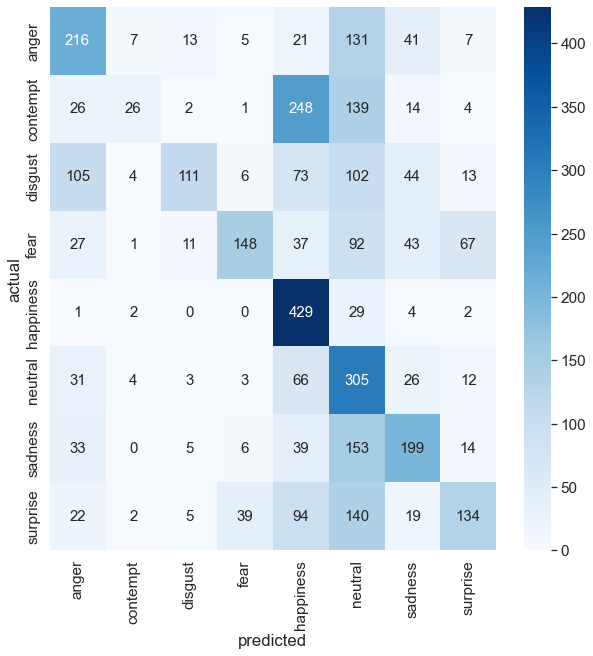

In [24]:
predictions = model.predict(X_val)
confusion = confusion_matrix(
    np.argmax(y_val, axis=1),
    np.argmax(predictions, axis=1)
)

labels = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (10, 10))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")

In [25]:
model.load_weights("../models/AN/AN-VGG16-blm-12-0.16.h5")

loss, acc = model.evaluate(X_val, y_val)
loss, acc

113/113 [==============================] - 64s 569ms/step - loss: 3.6741 - accuracy: 0.4348


(3.674072742462158, 0.43483084440231323)

<AxesSubplot:xlabel='predicted', ylabel='actual'>

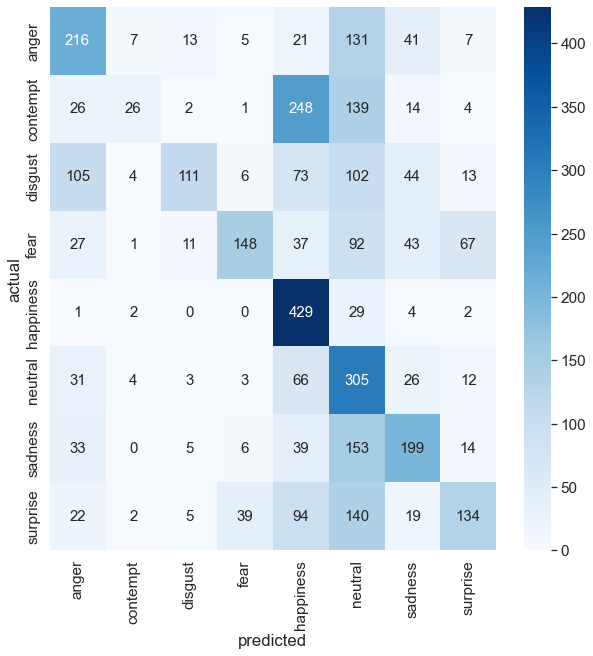

In [26]:
predictions = model.predict(X_val)
confusion = confusion_matrix(
    np.argmax(y_val, axis=1),
    np.argmax(predictions, axis=1)
)

labels = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (10, 10))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")

In [4]:
best_loss_checkpoint = ModelCheckpoint(
    filepath='../models/AN-CV/AN-VGG16-blm-{epoch:02d}-{loss:.2f}.h5',
    monitor='loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath='../models/AN-CV/AN-VGG16-bvlm-{epoch:02d}-{val_loss:.2f}.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

best_acc_checkpoint = ModelCheckpoint(
    filepath='../models/AN-CV/AN-VGG16-bam-{epoch:02d}-{accuracy:.2f}.h5',
    monitor='accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max'
)

best_val_acc_checkpoint = ModelCheckpoint(
    filepath='../models/AN-CV/AN-VGG16-bvam-{epoch:02d}-{val_accuracy:.2f}.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max'
)

In [6]:
X_train = np.concatenate((X_train, X_test), axis=0)
y_train = np.concatenate((y_train, y_test), axis=0)

X_train.shape, y_train.shape

((259595, 48, 48, 1), (259595, 8))

In [8]:
model.load_weights("../models/AN/AN-VGG16-blm-12-0.16.h5")

bs = 64
history = model.fit(
    datagen.flow(X_train, y_train, shuffle=True, batch_size=bs),
    steps_per_epoch=len(X_train) // bs,
    validation_data=(X_val, y_val),
    validation_batch_size=bs,
    validation_steps=len(X_val) // bs,
    epochs=13,  
    verbose=1, 
    initial_epoch=12,  
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint, best_acc_checkpoint, best_val_acc_checkpoint]
)

Epoch 13/13
4056/4056 [==============================] - 20644s 5s/step - loss: 0.4084 - accuracy: 0.8766 - val_loss: 2.2620 - val_accuracy: 0.4406


In [8]:
model.load_weights("../models/AN/AN-VGG16-blm-13-0.41.h5")

bs = 64
history = model.fit(
    datagen.flow(X_train, y_train, shuffle=True, batch_size=bs),
    steps_per_epoch=len(X_train) // bs,
    validation_data=(X_val, y_val),
    validation_batch_size=bs,
    validation_steps=len(X_val) // bs,
    epochs=15,  
    verbose=1, 
    initial_epoch=13,  
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint, best_acc_checkpoint, best_val_acc_checkpoint]
)

Epoch 14/15
4056/4056 [==============================] - 22361s 6s/step - loss: 0.3278 - accuracy: 0.9000 - val_loss: 2.5935 - val_accuracy: 0.4208
Epoch 15/15
4056/4056 [==============================] - 21902s 5s/step - loss: 0.2731 - accuracy: 0.9161 - val_loss: 2.4982 - val_accuracy: 0.4456


In [7]:
X = np.concatenate((X_train, X_test), axis=0)
X = np.concatenate((X, X_val), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
y = np.concatenate((y, y_val), axis=0)

X.shape, y.shape

((263201, 48, 48, 1), (263201, 8))

In [32]:
kfold = KFold(n_splits=10, shuffle=True)

for i, (train, test) in enumerate(kfold.split(X, y)):
    np.save(f"../numpy/folds/fold-{i+1}-X_train.npy", X[train])
    np.save(f"../numpy/folds/fold-{i+1}-y_train.npy", y[train])
    np.save(f"../numpy/folds/fold-{i+1}-X_test.npy", X[test])
    np.save(f"../numpy/folds/fold-{i+1}-y_test.npy", y[test])

In [33]:
fold_no = 1
bs = 64
X_train = np.load(f"../numpy/folds/fold-{fold_no}-X_train.npy")
y_train = np.load(f"../numpy/folds/fold-{fold_no}-y_train.npy")
X_test = np.load(f"../numpy/folds/fold-{fold_no}-X_test.npy")
y_test = np.load(f"../numpy/folds/fold-{fold_no}-y_test.npy")

model.load_weights("../models/AN/AN-VGG16-blm-15-0.27.h5")

history = model.fit(
    datagen.flow(X_train, y_train, shuffle=True, batch_size=bs),
    validation_data=(X_test, y_test), 
    steps_per_epoch=len(X_train) // bs,
    batch_size=bs, 
    epochs=16,
    initial_epoch=15,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint, best_acc_checkpoint, best_val_acc_checkpoint]
)

Epoch 16/16
3701/3701 [==============================] - 19949s 5s/step - loss: 0.2679 - accuracy: 0.9200 - val_loss: 0.2938 - val_accuracy: 0.9115


In [10]:
fold_no = 2
bs = 64
X_train = np.load(f"../numpy/folds/fold-{fold_no}-X_train.npy")
y_train = np.load(f"../numpy/folds/fold-{fold_no}-y_train.npy")
X_test = np.load(f"../numpy/folds/fold-{fold_no}-X_test.npy")
y_test = np.load(f"../numpy/folds/fold-{fold_no}-y_test.npy")

model.load_weights("../models/AN-CV/AN-VGG16-blm-16-0.27.h5")

history = model.fit(
    datagen.flow(X_train, y_train, shuffle=True, batch_size=bs),
    validation_data=(X_test, y_test), 
    steps_per_epoch=len(X_train) // bs,
    batch_size=bs, 
    epochs=17,
    initial_epoch=16,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint, best_acc_checkpoint, best_val_acc_checkpoint]
)

Epoch 17/17
3701/3701 [==============================] - 18518s 5s/step - loss: 0.2406 - accuracy: 0.9270 - val_loss: 0.2564 - val_accuracy: 0.9185


In [11]:
fold_no = 3
bs = 64
X_train = np.load(f"../numpy/folds/fold-{fold_no}-X_train.npy")
y_train = np.load(f"../numpy/folds/fold-{fold_no}-y_train.npy")
X_test = np.load(f"../numpy/folds/fold-{fold_no}-X_test.npy")
y_test = np.load(f"../numpy/folds/fold-{fold_no}-y_test.npy")

model.load_weights("../models/AN-CV/AN-VGG16-blm-17-0.24.h5")

history = model.fit(
    datagen.flow(X_train, y_train, shuffle=True, batch_size=bs),
    validation_data=(X_test, y_test), 
    steps_per_epoch=len(X_train) // bs,
    batch_size=bs, 
    epochs=18,
    initial_epoch=17,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint, best_acc_checkpoint, best_val_acc_checkpoint]
)

Epoch 18/18
3701/3701 [==============================] - 18459s 5s/step - loss: 0.2127 - accuracy: 0.9348 - val_loss: 0.2495 - val_accuracy: 0.9208


In [6]:
fold_no = 4
bs = 64
X_train = np.load(f"../numpy/folds/fold-{fold_no}-X_train.npy")
y_train = np.load(f"../numpy/folds/fold-{fold_no}-y_train.npy")
X_test = np.load(f"../numpy/folds/fold-{fold_no}-X_test.npy")
y_test = np.load(f"../numpy/folds/fold-{fold_no}-y_test.npy")

model.load_weights("../models/AN-CV/AN-VGG16-blm-18-0.21.h5")

history = model.fit(
    datagen.flow(X_train, y_train, shuffle=True, batch_size=bs),
    validation_data=(X_test, y_test), 
    steps_per_epoch=len(X_train) // bs,
    batch_size=bs, 
    epochs=19,
    initial_epoch=18,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint, best_acc_checkpoint, best_val_acc_checkpoint]
)

Epoch 19/19
3701/3701 [==============================] - 18672s 5s/step - loss: 0.2262 - accuracy: 0.9289 - val_loss: 0.2075 - val_accuracy: 0.9348


In [6]:
fold_no = 5
bs = 64
X_train = np.load(f"../numpy/folds/fold-{fold_no}-X_train.npy")
y_train = np.load(f"../numpy/folds/fold-{fold_no}-y_train.npy")
X_test = np.load(f"../numpy/folds/fold-{fold_no}-X_test.npy")
y_test = np.load(f"../numpy/folds/fold-{fold_no}-y_test.npy")

model.load_weights("../models/AN-CV/AN-VGG16-blm-19-0.23.h5")

history = model.fit(
    datagen.flow(X_train, y_train, shuffle=True, batch_size=bs),
    validation_data=(X_test, y_test), 
    steps_per_epoch=len(X_train) // bs,
    batch_size=bs, 
    epochs=20,
    initial_epoch=19,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint, best_acc_checkpoint, best_val_acc_checkpoint]
)

Epoch 20/20
3701/3701 [==============================] - 24127s 7s/step - loss: 0.1947 - accuracy: 0.9395 - val_loss: 0.1992 - val_accuracy: 0.9369


In [6]:
fold_no = 6
bs = 64
X_train = np.load(f"../numpy/folds/fold-{fold_no}-X_train.npy")
y_train = np.load(f"../numpy/folds/fold-{fold_no}-y_train.npy")
X_test = np.load(f"../numpy/folds/fold-{fold_no}-X_test.npy")
y_test = np.load(f"../numpy/folds/fold-{fold_no}-y_test.npy")

model.load_weights("../models/AN-CV/AN-VGG16-blm-20-0.19.h5")

history = model.fit(
    datagen.flow(X_train, y_train, shuffle=True, batch_size=bs),
    validation_data=(X_test, y_test), 
    steps_per_epoch=len(X_train) // bs,
    batch_size=bs, 
    epochs=21,
    initial_epoch=20,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint, best_acc_checkpoint, best_val_acc_checkpoint]
)

Epoch 21/21
3701/3701 [==============================] - 18657s 5s/step - loss: 0.1782 - accuracy: 0.9448 - val_loss: 0.1803 - val_accuracy: 0.9433


In [5]:
fold_no = 7
bs = 64
X_train = np.load(f"../numpy/folds/fold-{fold_no}-X_train.npy")
y_train = np.load(f"../numpy/folds/fold-{fold_no}-y_train.npy")
X_test = np.load(f"../numpy/folds/fold-{fold_no}-X_test.npy")
y_test = np.load(f"../numpy/folds/fold-{fold_no}-y_test.npy")

model.load_weights("../models/AN-CV/AN-VGG16-blm-21-0.18.h5")

history = model.fit(
    datagen.flow(X_train, y_train, shuffle=True, batch_size=bs),
    validation_data=(X_test, y_test), 
    steps_per_epoch=len(X_train) // bs,
    batch_size=bs, 
    epochs=22,
    initial_epoch=21,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint, best_acc_checkpoint, best_val_acc_checkpoint]
)

Epoch 22/22
3701/3701 [==============================] - 19194s 5s/step - loss: 0.1803 - accuracy: 0.9440 - val_loss: 0.2052 - val_accuracy: 0.9328


In [6]:
fold_no = 8
bs = 64
X_train = np.load(f"../numpy/folds/fold-{fold_no}-X_train.npy")
y_train = np.load(f"../numpy/folds/fold-{fold_no}-y_train.npy")
X_test = np.load(f"../numpy/folds/fold-{fold_no}-X_test.npy")
y_test = np.load(f"../numpy/folds/fold-{fold_no}-y_test.npy")

model.load_weights("../models/AN-CV/AN-VGG16-blm-22-0.18.h5")

history = model.fit(
    datagen.flow(X_train, y_train, shuffle=True, batch_size=bs),
    validation_data=(X_test, y_test), 
    steps_per_epoch=len(X_train) // bs,
    batch_size=bs, 
    epochs=23,
    initial_epoch=22,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint, best_acc_checkpoint, best_val_acc_checkpoint]
)

Epoch 23/23
3701/3701 [==============================] - 19492s 5s/step - loss: 0.1667 - accuracy: 0.9475 - val_loss: 0.1632 - val_accuracy: 0.9464


In [5]:
fold_no = 9
bs = 64
X_train = np.load(f"../numpy/folds/fold-{fold_no}-X_train.npy")
y_train = np.load(f"../numpy/folds/fold-{fold_no}-y_train.npy")
X_test = np.load(f"../numpy/folds/fold-{fold_no}-X_test.npy")
y_test = np.load(f"../numpy/folds/fold-{fold_no}-y_test.npy")

model.load_weights("../models/AN-CV/AN-VGG16-blm-23-0.17.h5")

history = model.fit(
    datagen.flow(X_train, y_train, shuffle=True, batch_size=bs),
    validation_data=(X_test, y_test), 
    steps_per_epoch=len(X_train) // bs,
    batch_size=bs, 
    epochs=24,
    initial_epoch=23,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint, best_acc_checkpoint, best_val_acc_checkpoint]
)

Epoch 24/24
3701/3701 [==============================] - 18634s 5s/step - loss: 0.1691 - accuracy: 0.9469 - val_loss: 0.1588 - val_accuracy: 0.9485


In [5]:
fold_no = 10
bs = 64
X_train = np.load(f"../numpy/folds/fold-{fold_no}-X_train.npy")
y_train = np.load(f"../numpy/folds/fold-{fold_no}-y_train.npy")
X_test = np.load(f"../numpy/folds/fold-{fold_no}-X_test.npy")
y_test = np.load(f"../numpy/folds/fold-{fold_no}-y_test.npy")

model.load_weights("../models/AN-CV/AN-VGG16-blm-24-0.17.h5")

history = model.fit(
    datagen.flow(X_train, y_train, shuffle=True, batch_size=bs),
    validation_data=(X_test, y_test), 
    steps_per_epoch=len(X_train) // bs,
    batch_size=bs, 
    epochs=25,
    initial_epoch=24,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint, best_acc_checkpoint, best_val_acc_checkpoint]
)

Epoch 25/25
3701/3701 [==============================] - 18723s 5s/step - loss: 0.1564 - accuracy: 0.9508 - val_loss: 0.1577 - val_accuracy: 0.9489


In [3]:
model.load_weights("../models/AN-CV/AN-VGG16-blm-25-0.16.h5")

In [12]:
predictions = model.predict(X, verbose=1)

8226/8226 [==============================] - 4416s 537ms/step


<AxesSubplot:xlabel='predicted', ylabel='actual'>

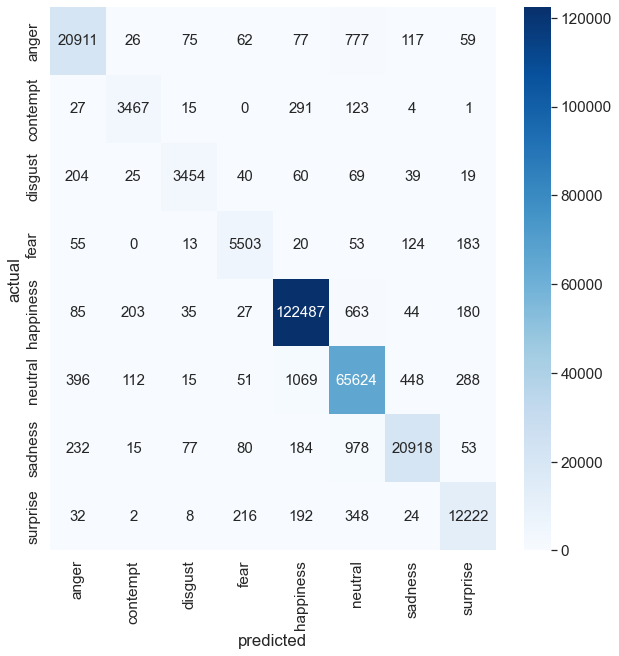

In [13]:
confusion = confusion_matrix(
    np.argmax(y, axis=1),
    np.argmax(predictions, axis=1)
)

labels = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (10, 10))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")